In [1]:
import matplotlib.pyplot as plt

# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

type(file_content)

file_content[0:4]


# Adapted from: https://stackoverflow.com/questions/51220161/how-to-convert-from-bytes-to-int

int.from_bytes(file_content[0:4], byteorder='big')


int.from_bytes(file_content[4:8], byteorder='big')


int.from_bytes(file_content[8:12], byteorder='big')

int.from_bytes(file_content[12:16], byteorder='big')

int.from_bytes(file_content[278:279], byteorder='big')

l = file_content[16:800]

type(l)

import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')


import numpy as np
# Import keras.
import keras as kr

# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)
inputs = train_img.reshape(60000, 784)

# For encoding categorical variables.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

for i in range(10):
    print(i, encoder.transform([i]))


model.fit(inputs, outputs, epochs=2, batch_size=100)

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)


(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

model.predict(test_img[5:6])

import matplotlib.pyplot as plt
plt.imshow(test_img[5].reshape(28, 28), cmap='gray')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
5 [0 0 0 0 0 1 0 0 0 0]
0 [[1 0 0 0 0 0 0 0 0 0]]
1 [[0 1 0 0 0 0 0 0 0 0]]
2 [[0 0 1 0 0 0 0 0 0 0]]
3 [[0 0 0 1 0 0 0 0 0 0]]
4 [[0 0 0 0 1 0 0 0 0 0]]
5 [[0 0 0 0 0 1 0 0 0 0]]
6 [[0 0 0 0 0 0 1 0 0 0]]
7 [[0 0 0 0 0 0 0 1 0 0]]
8 [[0 0 0 0 0 0 0 0 1 0]]
9 [[0 0 0 0 0 0 0 0 0 1]]
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
60000/60000 [==============================] - 12s 197us/step - loss: 0.5619 - accuracy: 0.8349
Epoch 2/2
60000/60000 [==============================] - 11s 175us/step - loss: 0.2521 - accuracy: 0.9222


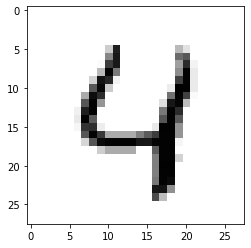

In [13]:
import matplotlib.pyplot as plt
plt.imshow(test_img[4].reshape(28, 28), cmap='gray')